# **Apache Spark Modelling**

**Importation and Installing of necessary libraries**

In [1]:
!pip install pyspark --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [9]:
import zipfile

with zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/archive (22).zip", "r") as zip_file:
  zip_file.extractall("/content/drive/MyDrive/Classification_Data")

In [3]:
import pandas as pd
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

In [4]:
# Creating a spark session (Main entry point for spark applications)

spark = SparkSession.builder.appName('price_pred').getOrCreate()

In [5]:
spark

**Data sourcing**

In [6]:
df = spark.read.csv('/content/drive/MyDrive/Classification_Data/train.csv',header=True)

**Checking info about our data**

In [13]:
# Investigating the dataframe's schema and size.

df.printSchema()

print('\n')
print('Dataframe Size')
print((df.count(),len(df.columns)))

root
 |-- battery_power: string (nullable = true)
 |-- blue: string (nullable = true)
 |-- clock_speed: string (nullable = true)
 |-- dual_sim: string (nullable = true)
 |-- fc: string (nullable = true)
 |-- four_g: string (nullable = true)
 |-- int_memory: string (nullable = true)
 |-- m_dep: string (nullable = true)
 |-- mobile_wt: string (nullable = true)
 |-- n_cores: string (nullable = true)
 |-- pc: string (nullable = true)
 |-- px_height: string (nullable = true)
 |-- px_width: string (nullable = true)
 |-- ram: string (nullable = true)
 |-- sc_h: string (nullable = true)
 |-- sc_w: string (nullable = true)
 |-- talk_time: string (nullable = true)
 |-- three_g: string (nullable = true)
 |-- touch_screen: string (nullable = true)
 |-- wifi: string (nullable = true)
 |-- price_range: string (nullable = true)



Dataframe Size
(2000, 21)


In [9]:
df.show(5)

+-------------+----+-----------+--------+---+------+----------+-----+---------+-------+---+---------+--------+----+----+----+---------+-------+------------+----+-----------+
|battery_power|blue|clock_speed|dual_sim| fc|four_g|int_memory|m_dep|mobile_wt|n_cores| pc|px_height|px_width| ram|sc_h|sc_w|talk_time|three_g|touch_screen|wifi|price_range|
+-------------+----+-----------+--------+---+------+----------+-----+---------+-------+---+---------+--------+----+----+----+---------+-------+------------+----+-----------+
|          842|   0|        2.2|       0|  1|     0|         7|  0.6|      188|      2|  2|       20|     756|2549|   9|   7|       19|      0|           0|   1|          1|
|         1021|   1|        0.5|       1|  0|     1|        53|  0.7|      136|      3|  6|      905|    1988|2631|  17|   3|        7|      1|           1|   0|          2|
|          563|   1|        0.5|       1|  2|     1|        41|  0.9|      145|      5|  6|     1263|    1716|2603|  11|   2|     

In [15]:
# Brief statistics about our data

df.summary().show()

+-------+-----------------+------------------+------------------+------------------+-----------------+-------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+-----------------+------------------+-----------------+-----------------+-----------------+-----------------+------------------+------------------+------------------+
|summary|    battery_power|              blue|       clock_speed|          dual_sim|               fc|             four_g|        int_memory|             m_dep|        mobile_wt|           n_cores|               pc|         px_height|         px_width|               ram|             sc_h|             sc_w|        talk_time|          three_g|      touch_screen|              wifi|       price_range|
+-------+-----------------+------------------+------------------+------------------+-----------------+-------------------+------------------+------------------+-----------------+------------------+-

In [16]:
df.dtypes

[('battery_power', 'string'),
 ('blue', 'string'),
 ('clock_speed', 'string'),
 ('dual_sim', 'string'),
 ('fc', 'string'),
 ('four_g', 'string'),
 ('int_memory', 'string'),
 ('m_dep', 'string'),
 ('mobile_wt', 'string'),
 ('n_cores', 'string'),
 ('pc', 'string'),
 ('px_height', 'string'),
 ('px_width', 'string'),
 ('ram', 'string'),
 ('sc_h', 'string'),
 ('sc_w', 'string'),
 ('talk_time', 'string'),
 ('three_g', 'string'),
 ('touch_screen', 'string'),
 ('wifi', 'string'),
 ('price_range', 'string')]

# **EDA**

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
viz_df = df.toPandas()
viz_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


**Visualizing the target variable**

In [70]:
viz_df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

Text(0.5, 1.0, 'Price_Range Distribution')

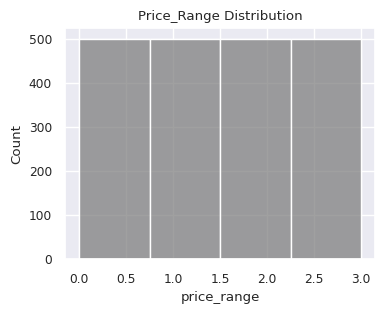

In [81]:
sns.set(style='darkgrid')
sns.set(font_scale=0.8)
plt.figure(figsize=(4,3))
sns.histplot(x=viz_df['price_range'],color='grey',bins=4)
plt.title('Price_Range Distribution')

It seems our classes are balanced ie Equal occurrences of all classes present.

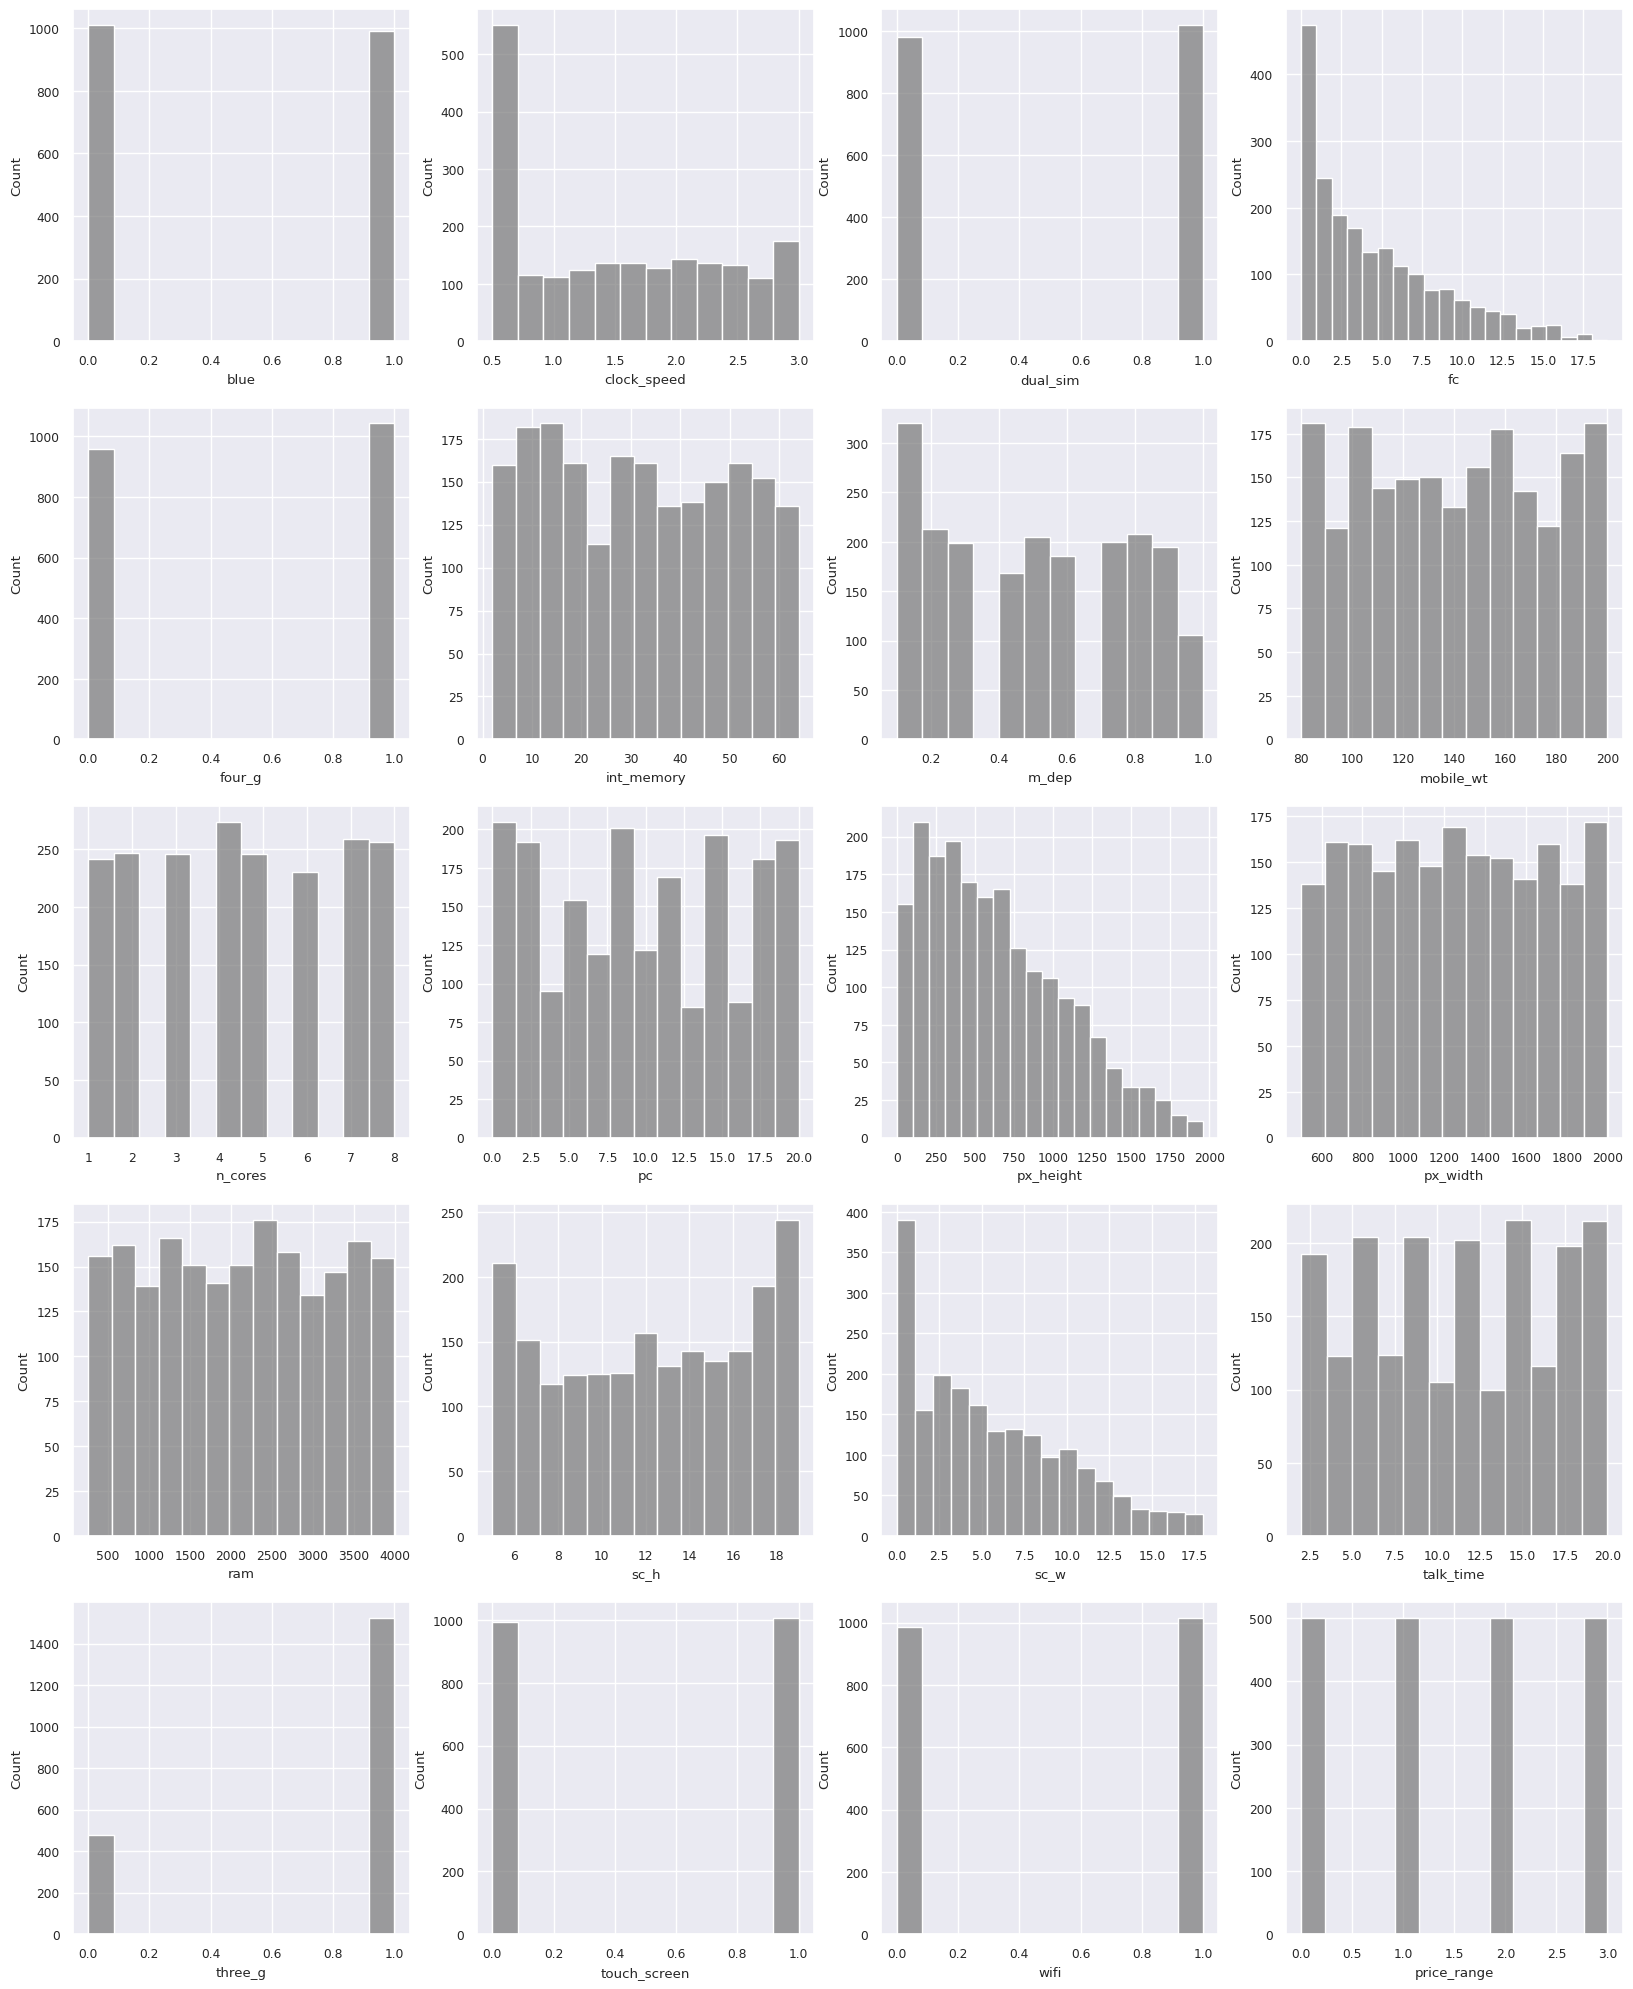

In [94]:
fig = plt.figure(figsize=(20,25))
for i in range(1,len(viz_df.columns)):
  ax = fig.add_subplot(5,4,i)
  sns.histplot(x=viz_df.iloc[:,i],color='grey')

Findings:

- Majority of our features appear to be uniformly distributed with the exception of a few ie: sc_w,fc
- It appears some of the features have been pre-engineered. ie Are represented by 1 or 0 to signify absence or presence ie touch_screen, wifi

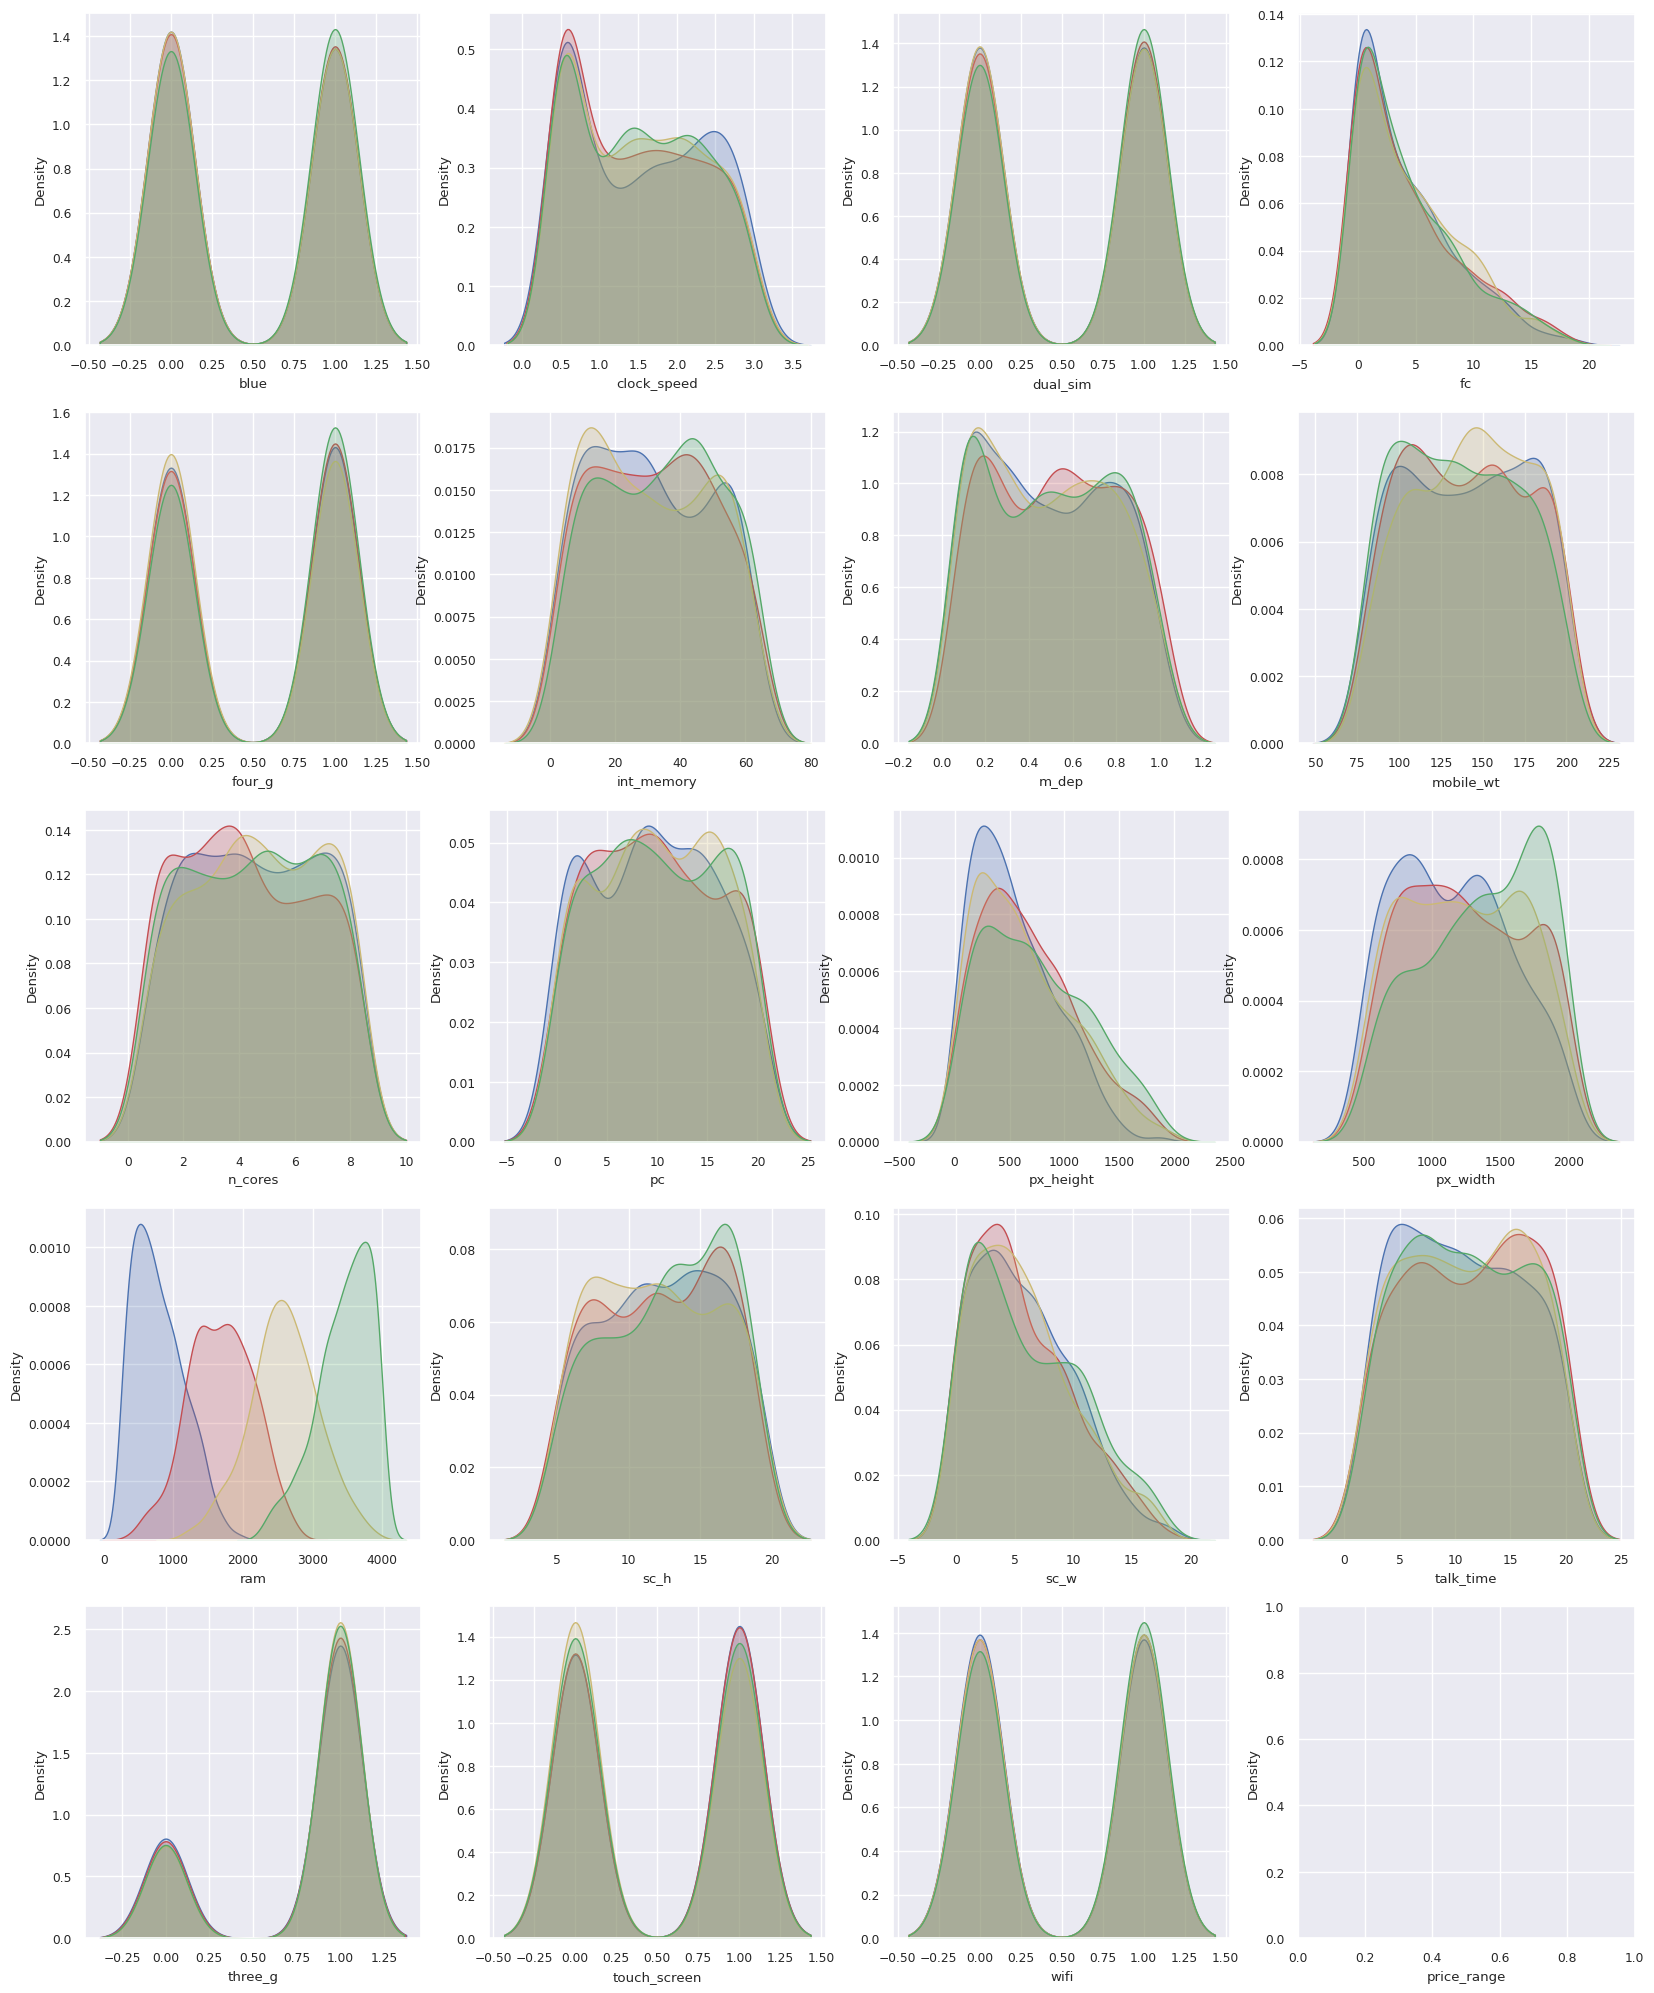

In [85]:
fig = plt.figure(figsize=(20,25))
for i in range(1,len(viz_df.columns)):
  ax = fig.add_subplot(5,4,i)
  sns.kdeplot(viz_df[viz_df.columns[i]][viz_df['price_range'] == 0],fill=True,color='b',warn_singular=False)
  sns.kdeplot(viz_df[viz_df.columns[i]][viz_df['price_range'] == 1],fill=True,color='r',warn_singular=False)
  sns.kdeplot(viz_df[viz_df.columns[i]][viz_df['price_range'] == 2],fill=True,color='y',warn_singular=False)
  sns.kdeplot(viz_df[viz_df.columns[i]][viz_df['price_range'] == 3],fill=True,color='g',warn_singular=False)

Taking a deeper dive into distribution of the features in relation to the classes present:

- The only standout seems to be the feature [ram] where we can visually separate the classes based on the feature.

# **Data preparation and feature engineering**

In [31]:
from pyspark.sql.functions import col,when,count

In [28]:
# converting to desired dtypes

float_cols = ['clock_speed','m_dep']

In [29]:
for col in df.columns:
  if col in float_cols:
    df = df.withColumn(col,df[col].cast('float'))
  else:
    df = df.withColumn(col,df[col].cast('integer'))

In [30]:
df.dtypes

[('battery_power', 'int'),
 ('blue', 'int'),
 ('clock_speed', 'float'),
 ('dual_sim', 'int'),
 ('fc', 'int'),
 ('four_g', 'int'),
 ('int_memory', 'int'),
 ('m_dep', 'float'),
 ('mobile_wt', 'int'),
 ('n_cores', 'int'),
 ('pc', 'int'),
 ('px_height', 'int'),
 ('px_width', 'int'),
 ('ram', 'int'),
 ('sc_h', 'int'),
 ('sc_w', 'int'),
 ('talk_time', 'int'),
 ('three_g', 'int'),
 ('touch_screen', 'int'),
 ('wifi', 'int'),
 ('price_range', 'int')]

**Missingness**

In [34]:
df.select([count(when(col(c).isNull() | col(c).contains('None') | col(c).contains('NULL') | (col(c) == ''),c)).alias(c)
for c in df.columns]).show()

+-------------+----+-----------+--------+---+------+----------+-----+---------+-------+---+---------+--------+---+----+----+---------+-------+------------+----+-----------+
|battery_power|blue|clock_speed|dual_sim| fc|four_g|int_memory|m_dep|mobile_wt|n_cores| pc|px_height|px_width|ram|sc_h|sc_w|talk_time|three_g|touch_screen|wifi|price_range|
+-------------+----+-----------+--------+---+------+----------+-----+---------+-------+---+---------+--------+---+----+----+---------+-------+------------+----+-----------+
|            0|   0|          0|       0|  0|     0|         0|    0|        0|      0|  0|        0|       0|  0|   0|   0|        0|      0|           0|   0|          0|
+-------------+----+-----------+--------+---+------+----------+-----+---------+-------+---+---------+--------+---+----+----+---------+-------+------------+----+-----------+



No misssing data in out dataset

In [45]:
from pyspark.ml.feature import ChiSqSelector, VectorAssembler

In [42]:
features_df = df.select("*").drop("price_range")

In [44]:
features = features_df.columns
print(features)

['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']


In [46]:
# Assembling the features

assembler = VectorAssembler(inputCols=features, outputCol='features')

new_df = assembler.transform(df)

In [48]:
new_df.show(5)

+-------------+----+-----------+--------+---+------+----------+-----+---------+-------+---+---------+--------+----+----+----+---------+-------+------------+----+-----------+--------------------+
|battery_power|blue|clock_speed|dual_sim| fc|four_g|int_memory|m_dep|mobile_wt|n_cores| pc|px_height|px_width| ram|sc_h|sc_w|talk_time|three_g|touch_screen|wifi|price_range|            features|
+-------------+----+-----------+--------+---+------+----------+-----+---------+-------+---+---------+--------+----+----+----+---------+-------+------------+----+-----------+--------------------+
|          842|   0|        2.2|       0|  1|     0|         7|  0.6|      188|      2|  2|       20|     756|2549|   9|   7|       19|      0|           0|   1|          1|[842.0,0.0,2.2000...|
|         1021|   1|        0.5|       1|  0|     1|        53|  0.7|      136|      3|  6|      905|    1988|2631|  17|   3|        7|      1|           1|   0|          2|[1021.0,1.0,0.5,1...|
|          563|   1|     

In [52]:
# feature selection

selector = ChiSqSelector(numTopFeatures=10, featuresCol="features",
                         outputCol="selectedFeatures", labelCol="price_range")

result = selector.fit(new_df).transform(new_df)

In [53]:
result.show(3)

+-------------+----+-----------+--------+---+------+----------+-----+---------+-------+---+---------+--------+----+----+----+---------+-------+------------+----+-----------+--------------------+--------------------+
|battery_power|blue|clock_speed|dual_sim| fc|four_g|int_memory|m_dep|mobile_wt|n_cores| pc|px_height|px_width| ram|sc_h|sc_w|talk_time|three_g|touch_screen|wifi|price_range|            features|    selectedFeatures|
+-------------+----+-----------+--------+---+------+----------+-----+---------+-------+---+---------+--------+----+----+----+---------+-------+------------+----+-----------+--------------------+--------------------+
|          842|   0|        2.2|       0|  1|     0|         7|  0.6|      188|      2|  2|       20|     756|2549|   9|   7|       19|      0|           0|   1|          1|[842.0,0.0,2.2000...|[842.0,1.0,7.0,18...|
|         1021|   1|        0.5|       1|  0|     1|        53|  0.7|      136|      3|  6|      905|    1988|2631|  17|   3|        7| 

# **Modelling**

In [54]:
# Split the data
(training_data, test_data) = result.randomSplit([0.8,0.2])

In [55]:
from pyspark.ml.classification import RandomForestClassifier

In [56]:
rf = RandomForestClassifier(labelCol='price_range',
                            featuresCol='selectedFeatures',
                            maxDepth= 3,
                            numTrees=10)

In [57]:
model = rf.fit(training_data)

In [58]:
predictions = model.transform(test_data)

**Model Evaluation**

In [60]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator as mse

In [61]:
evaluator = mse(
    labelCol = 'price_range',
    predictionCol = 'prediction',
    metricName = 'accuracy'
)

In [62]:
accuracy = evaluator.evaluate(predictions)
print(f'Model Accuracy: {accuracy}')

Model Accuracy: 0.7929411764705883
